In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd
import geodatasets

In [9]:
data = pd.read_csv('A0_CORESIDENCE_NATIONAL_DATASET.csv')
codebook = pd.read_csv('CODEBOOK.csv')

name_dict = dict(zip(codebook['Code'], codebook['Description']))

data.rename(name_dict, axis=1, inplace=True)
data.head()

,Country ISO nomenclature 2 digits,Country ISO nomenclature 3 digits,Country,Continent,Sub continent,Year,Census round,Most recent year,Five years,Decade,...,Gross National Income per capita,Human development index female,Expected years of schooling female,Mean years of schooling female,Gross National Income per capita female,Human development index male,Expected years of schooling male,Mean years of schooling male,Gross National Income per capita male,DB
0,AF,AFG,Afghanistan,ASIA,Southern Asia,2015,2010,1,2011,2010,...,2101.589319,0.364833,7.791942,1.272154,681.131699,0.542189,12.44832,3.015346,3489.646939,NATIONAL
1,AO,AGO,Angola,AFRICA,Middle Africa,2015,2010,1,2011,2010,...,7652.656486,0.549279,10.690100,3.657993,6626.812049,0.614968,12.70450,5.922784,8705.839878,NATIONAL
2,AL,ALB,Albania,EUROPE,Southern Europe,2008,2010,0,2006,2000,...,9962.442236,0.715264,12.348200,8.771930,7208.741202,0.753432,11.90664,9.836990,12720.559540,NATIONAL
3,AL,ALB,Albania,EUROPE,Southern Europe,2017,2020,1,2016,2010,...,12802.148310,0.797816,15.511230,11.122311,10148.612870,0.805385,14.17994,10.721275,15442.824030,NATIONAL
4,AR,ARG,Argentina,LATIN-AMERICA,South America,1970,1970,0,1966,1960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NATIONAL


## dataset: Global coresident data
https://zenodo.org/records/8142652

### Lets see the data coverage
data collection years cyclical - every 5 years in some areas


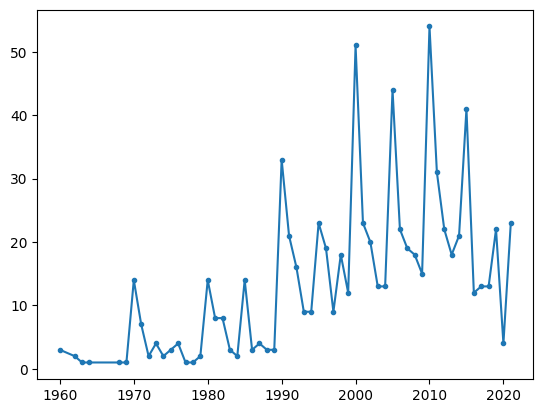

In [10]:
plt.plot(data['Year'].value_counts().sort_index(), marker='.')

### What about by subcontinent? 


In [11]:
# continent_data[['AFRICA', 'ASIA', 'EUROPE', 'LATIN-AMERICA', 'NORTH-AMERICA',
       # 'OCEANIA']]

In [16]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [20]:
world = gpd.read_file('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip')

world

HTTPError: HTTP Error 406: Not Acceptable

ValueError: operands could not be broadcast together with shapes (58,) (6,) 

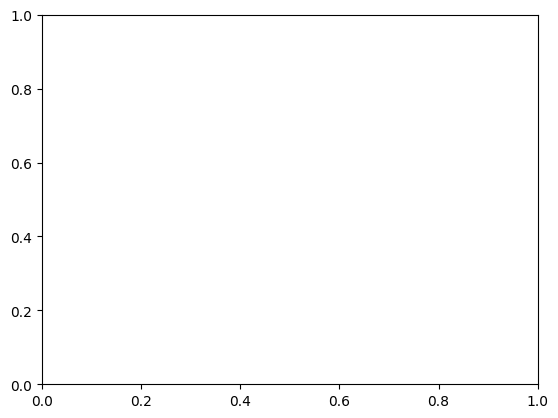

In [13]:
continent_data = data.pivot_table(columns='Continent', index='Year', values='Country', aggfunc='count')
continent_data.reset_index(inplace=True)
continent_data.fillna(0, inplace=True)

# sns.relplot(data=sub_continent_data, x='Year', y='Country', hue='Continent', kind='line')
plt.stackplot(continent_data['Year'] , continent_data[['AFRICA', 'ASIA', 'EUROPE', 'LATIN-AMERICA', 'NORTH-AMERICA',
       'OCEANIA']])